In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

2023-02-21 09:55:46.753636: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-21 09:55:46.937317: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2023-02-21 09:55:57--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 104.26.3.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv.1’

insurance.csv.1     100%[===================>]  49.09K  --.-KB/s    in 0.04s   

2023-02-21 09:55:58 (1.24 MB/s) - ‘insurance.csv.1’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [3]:
# split data into x (features) and y (labels)
x = dataset.copy()
y = x.pop('expenses')

# Split into train and test sets
train_dataset_raw, test_dataset_raw, train_labels, test_labels = train_test_split(x, y, test_size=0.2, random_state=42)

# check the lengths
len(train_dataset_raw), len(test_dataset_raw)

(1070, 268)

In [4]:
# Create a column transformer
ct = make_column_transformer(
    # normalize all numerical columns to values between 0 and 1
    (MinMaxScaler(), ['age', 'bmi', 'children']),
    # one-hot encode the categorical columns
    (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region'])
)

# fit the column transformer on the training data
ct.fit(train_dataset_raw)

# Transform the training and test data
train_dataset = ct.transform(train_dataset_raw)
test_dataset = ct.transform(test_dataset_raw)

In [5]:
# Set up EarlyStopping to stop training when loss stops improving
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

# Build a neural network
model = keras.models.Sequential([
    layers.Dense(100),
    layers.Dense(10),
    layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae', 'mse'])

# Train the model
history = model.fit(train_dataset, train_labels, epochs=1000, callbacks=[callback])

Epoch 1/1000


2023-02-21 09:56:17.886074: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


34/34 [==============================] - 0s 1ms/step - loss: 13343.2627 - mae: 13343.2627 - mse: 322374784.0000
Epoch 2/1000
34/34 [==============================] - 0s 717us/step - loss: 13334.1797 - mae: 13334.1797 - mse: 322135488.0000
Epoch 3/1000
34/34 [==============================] - 0s 725us/step - loss: 13311.8945 - mae: 13311.8945 - mse: 321531264.0000
Epoch 4/1000
34/34 [==============================] - 0s 718us/step - loss: 13266.0791 - mae: 13266.0791 - mse: 320277056.0000
Epoch 5/1000
34/34 [==============================] - 0s 724us/step - loss: 13185.7012 - mae: 13185.7012 - mse: 318102080.0000
Epoch 6/1000
34/34 [==============================] - 0s 787us/step - loss: 13059.9951 - mae: 13059.9951 - mse: 314813984.0000
Epoch 7/1000
34/34 [==============================] - 0s 721us/step - loss: 12878.8691 - mae: 12878.8691 - mse: 309937920.0000
Epoch 8/1000
34/34 [==============================] - 0s 704us/step - loss: 12632.0674 - mae: 12632.0674 - mse: 303718496.0000

34/34 [==============================] - 0s 662us/step - loss: 4474.7007 - mae: 4474.7007 - mse: 66453872.0000
Epoch 67/1000
34/34 [==============================] - 0s 667us/step - loss: 4358.5518 - mae: 4358.5518 - mse: 64706128.0000
Epoch 68/1000
34/34 [==============================] - 0s 664us/step - loss: 4248.7554 - mae: 4248.7554 - mse: 63014692.0000
Epoch 69/1000
34/34 [==============================] - 0s 697us/step - loss: 4148.7495 - mae: 4148.7495 - mse: 62142476.0000
Epoch 70/1000
34/34 [==============================] - 0s 682us/step - loss: 4053.8650 - mae: 4053.8650 - mse: 60214068.0000
Epoch 71/1000
34/34 [==============================] - 0s 741us/step - loss: 3971.3879 - mae: 3971.3879 - mse: 58899888.0000
Epoch 72/1000
34/34 [==============================] - 0s 691us/step - loss: 3899.1604 - mae: 3899.1604 - mse: 57257736.0000
Epoch 73/1000
34/34 [==============================] - 0s 734us/step - loss: 3840.9866 - mae: 3840.9866 - mse: 56275384.0000
Epoch 74/1000


34/34 [==============================] - 0s 714us/step - loss: 3582.8237 - mae: 3582.8237 - mse: 42216880.0000
Epoch 132/1000
34/34 [==============================] - 0s 702us/step - loss: 3580.0713 - mae: 3580.0713 - mse: 42139380.0000
Epoch 133/1000
34/34 [==============================] - 0s 743us/step - loss: 3579.7661 - mae: 3579.7661 - mse: 42118664.0000
Epoch 134/1000
34/34 [==============================] - 0s 680us/step - loss: 3579.4353 - mae: 3579.4353 - mse: 42024744.0000
Epoch 135/1000
34/34 [==============================] - 0s 700us/step - loss: 3576.3074 - mae: 3576.3074 - mse: 42137488.0000
Epoch 136/1000
34/34 [==============================] - 0s 680us/step - loss: 3571.2971 - mae: 3571.2971 - mse: 42030412.0000
Epoch 137/1000
34/34 [==============================] - 0s 745us/step - loss: 3574.2617 - mae: 3574.2617 - mse: 41939600.0000
Epoch 138/1000
34/34 [==============================] - 0s 668us/step - loss: 3567.7905 - mae: 3567.7905 - mse: 41840892.0000
Epoch 1

34/34 [==============================] - 0s 704us/step - loss: 3489.0762 - mae: 3489.0762 - mse: 46981884.0000
Epoch 197/1000
34/34 [==============================] - 0s 712us/step - loss: 3486.6353 - mae: 3486.6353 - mse: 47101208.0000
Epoch 198/1000
34/34 [==============================] - 0s 655us/step - loss: 3484.4238 - mae: 3484.4238 - mse: 47257696.0000
Epoch 199/1000
34/34 [==============================] - 0s 686us/step - loss: 3483.2161 - mae: 3483.2161 - mse: 47777892.0000
Epoch 200/1000
34/34 [==============================] - 0s 701us/step - loss: 3480.5293 - mae: 3480.5293 - mse: 47968284.0000
Epoch 201/1000
34/34 [==============================] - 0s 731us/step - loss: 3479.7058 - mae: 3479.7058 - mse: 48219088.0000
Epoch 202/1000
34/34 [==============================] - 0s 708us/step - loss: 3479.3240 - mae: 3479.3240 - mse: 48512212.0000
Epoch 203/1000
34/34 [==============================] - 0s 696us/step - loss: 3477.1892 - mae: 3477.1892 - mse: 48844768.0000
Epoch 2

9/9 - 0s - loss: 3164.1621 - mae: 3164.1621 - mse: 43040724.0000 - 85ms/epoch - 9ms/step
Testing set Mean Abs Error: 3164.16 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 662us/step


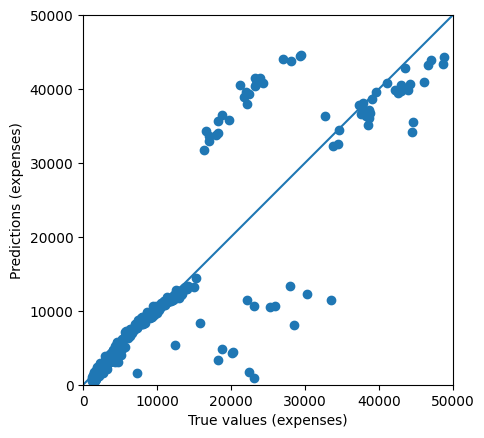

In [6]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
